# Pythonで始めるPysparkの基本 on Jupyter目次
1. 環境のセットアップをしてみよう  <---今回の動画はこちら
2. SparkでDataFameを使ってみよう(Word Count)
3. SparkSQLを使ってみよう
4. SparkをClusterで動かしてみよう(on Amazon EMR)
5. SparkでStreaming処理を動かしてみよう


## PySparkとは
複数のノード(PC)でデータを読み込んで、データを処理する分散フレームワークです。  
大きなデータを処理するときには、一台で処理を行うよりも効率が良く物事を処理することができるようになります。  
中身はPythonで利用する関数や変数などを利用することもできます。

Sparkのバージョンは3.1.1を利用します。  

世の中ABC人材(AI,BigData,Cloud)な人材になるための必須スキルと言っても過言ではありません。  

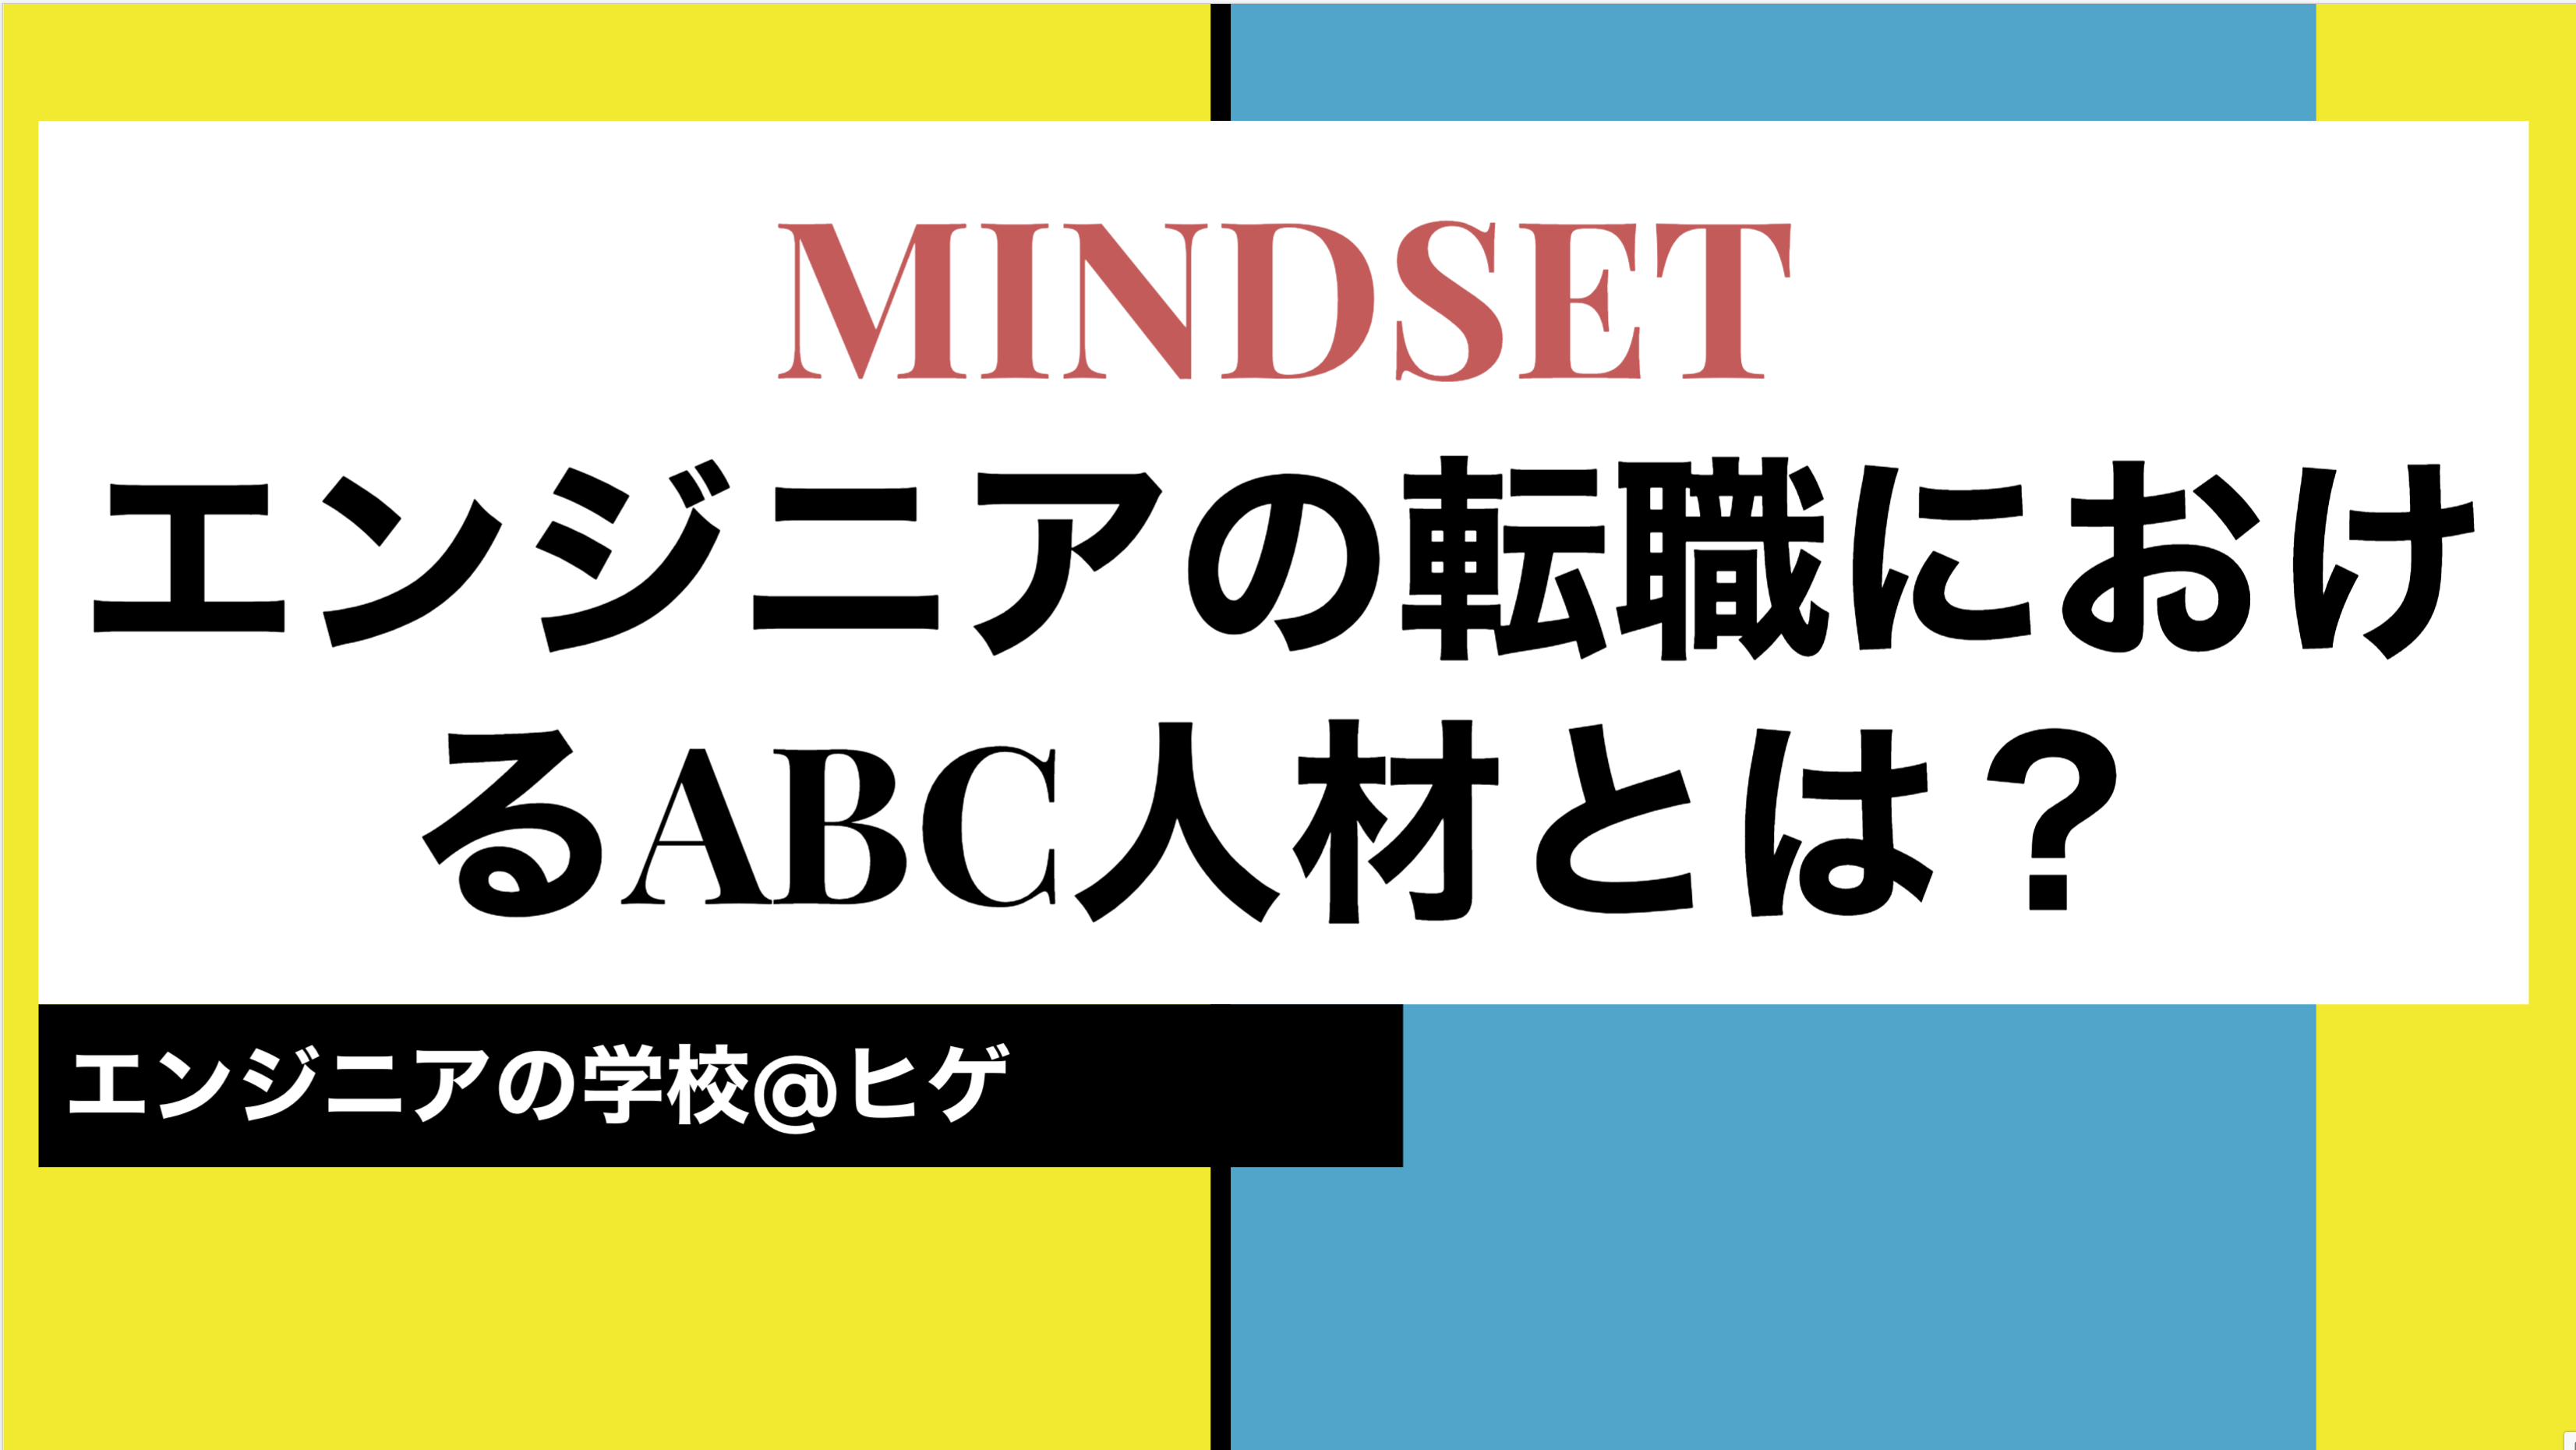

## 分散処理？
大きなテキストがあって、
そのテキストを複数の人間(パソコンで仕事を分担)
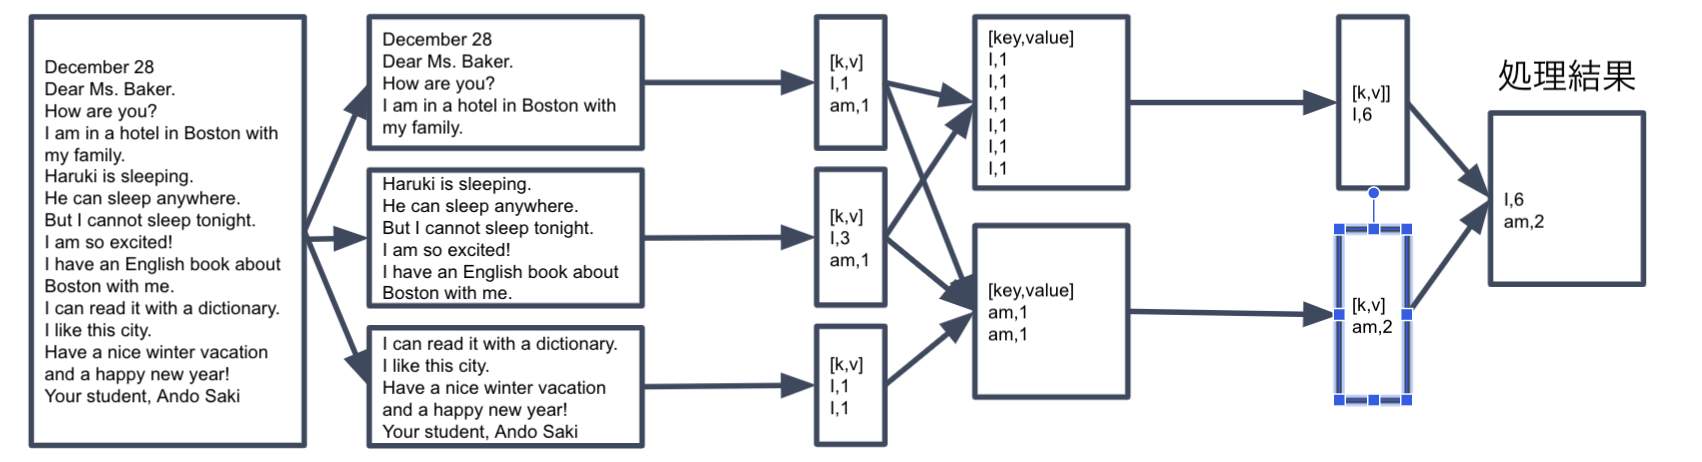

### 特徴
- Hadoopやk8sと言った分散フレームワーク上で処理が動きます。
- 大抵の問題はSparkが解決してくれる（ビッグデータ界隈では有名）
- Pythonの知識が流用できる
- Sparkは非常にコスパの良い言語（ビッグデータや機械学習の世界で一つの言語だけで戦える）


## 動作環境
今回の動作環境は、
Docker on Mac  
Jupyter on Docker  
での環境です。  


## 1. 環境のセットアップをしてみよう

# ⭐️今回はDockerを使います

## Dockerについては公式サイトのよりダウンロードしインストールを行います
### Macの方は
https://hub.docker.com/editions/community/docker-ce-desktop-mac

### windowsの方は
https://hub.docker.com/editions/community/docker-ce-desktop-windows/


## イメージファイルをPullします(https://hub.docker.com/r/jupyter/pyspark-notebook/)

### ターミナルにてコマンドを実行します
docker pull jupyter/pyspark-notebook

### Pullが完了しまたら以下のコマンドでnotebookを起動します
docker run -it -p 8888:8888 jupyter/pyspark-notebook

### 最後に
コンソールに以下のような表示が出てくると思います。
そのURLをコピーして、ブラウザに貼り付けてください。

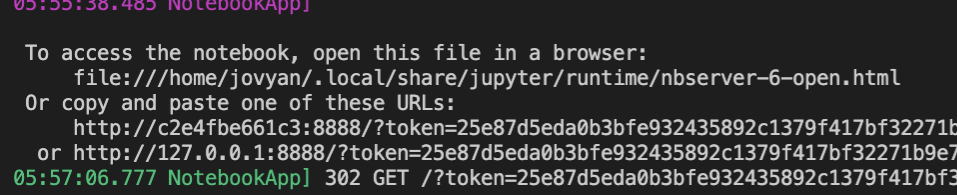

表示されるURL例：
http://127.0.0.1:8888/?token=25e87d5eda0b3bfe932435892c1379f417bf3227
へアクセスすることでnotebook環境の出来上がりです。

# それでは早速動作確認を行ってみましょう
## まずはノートブックの作成から
## PySpark動かしてみましょう

In [2]:
#pysparkに必要なライブラリを読み込む
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [3]:
#spark sessionの作成
spark = SparkSession.builder \
    .appName("hjogeghoge") \
    .config("hive.exec.dynamic.partition", "true") \
    .config("hive.exec.dynamic.partition.mode", "nonstrict") \
    .config("spark.sql.session.timeZone", "JST") \
    .enableHiveSupport() \
    .getOrCreate()

## SparkSessionとは？
Javaで言うところのインスタンスを作る作業のことです。  
今回の場合は、アプリケーション名が「hjogeghoge」で作成を行っています。  
非常に細かい設定ができるので、詳しくは公式のドキュメントを参考にしてください 
https://spark.apache.org/docs/3.1.1/

## Sparkでできることは大きく分けて3つあります
1. RDDの操作
2. バッチ処理(DataFrameの操作、SQL、関数)
3. データを一行づつ処理していくStreaming

今回のシリーズでは、2,3についてのみ解説を行なっていく予定です。  
実際の業務（数ペタバイトくらいであれば）RDDを利用した操作はあまり必要ありません。  
学習のコストを考えても2,3をマスターすることが先決と考えているからです。  

In [20]:
#pysparkによるspark sql
spark.sql("select 2 as data").show()

+----+
|data|
+----+
|   2|
+----+



In [21]:
#pysparkによるDataFrame
#sparkの戻り値はdataframeが多い
df=spark.sql("select 2 as data")
df.take(1)

[Row(data=2)]

# 次回は、PySparkでDataFameを使ってみよう(Word Count)
Spark界隈のHello worldであるワードカウントをしてみようと思います。